In [5]:
import pandas as pd
import numpy as np

In [9]:
df1 = pd.DataFrame({'key' : ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1' : range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                 'data2' : range(3)})

In [8]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [9]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [10]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [11]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [4]:
df3 = pd.DataFrame({'1key' : ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                   'data1' : range(7)})
df3

,1key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [3]:
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2' : range(3)})
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [6]:
pd.merge(df3, df4, left_on = '1key', right_on = 'rkey')

,1key,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [10]:
pd.merge(df1, df2, how = 'outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [11]:
df1 = pd.DataFrame({'key' : ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1' : range(6)})
df2 = pd.DataFrame({'key' : ['a', 'b', 'a', 'b', 'd'],
                    'data2' : range(5)})

In [12]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [13]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [14]:
pd.merge(df1, df2, on = 'key', how = 'left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [15]:
pd.merge(df1, df2, how = 'inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [16]:
left = pd.DataFrame({'key1' : ['foo', 'foo', 'bar'],
                     'key2' : ['one', 'two', 'one'],
                     'lval' : [1,2,3]})
right = pd.DataFrame({'key1' : ['foo', 'foo', 'bar', 'bar'],
                      'key2' : ['one', 'one', 'one', 'two'],
                      'rval' : [4,5,6,7]})

In [17]:
pd.merge(left, right, on = ['key1', 'key2'], how = 'outer')


,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [18]:
pd.merge(left, right, on = 'key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [20]:
pd.merge(left, right, on = 'key1', suffixes = ('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [21]:
left1 = pd.DataFrame({'key' : ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value' : range(6)})
right1 = pd.DataFrame({'group_val' : [3.5, 7]}, index = ['a', 'b'])

In [22]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [23]:
right1

,group_val
a,3.5
b,7.0


In [24]:
pd.merge(left1, right1, left_on = 'key', right_index = True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [25]:
pd.merge(left1, right1, left_on = 'key', right_index = True, how = 'outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [29]:
lefth = pd.DataFrame({'key1' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                      'key2' : [2000, 2001, 2002, 2001, 2002],
                      'data' : np.arange(5.)})

lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [30]:
righth = pd.DataFrame(np.arange(12).reshape((6,2)),
                      index = [['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                               [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns = ['event1', 'event2'])
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [33]:
pd.merge(lefth, righth, left_on = ['key1', 'key2'], right_index = True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [35]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], index = ['a', 'c', 'e'],
                     columns = ['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index = ['b', 'c', 'd', 'e'], columns = ['Missouri', 'Alabama'])

In [36]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [37]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [38]:
pd.merge(left2, right2, how = 'outer', left_index = True, right_index = True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [39]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [41]:
s1 = pd.Series([0,1], index = ['a', 'b'])

In [42]:
s2 = pd.Series([2,3,4], index = ['c', 'd', 'e'])

In [43]:
s3 = pd.Series([5,6], index = ['f', 'g'])

In [44]:
pd.concat([s1, s2 ,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [45]:
pd.concat([s1, s2, s3], axis = 1)

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [47]:
s4 = pd.concat([s1 * 5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [48]:
pd.concat([s1, s4], axis = 1)

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [49]:
pd.concat([s1, s3], axis = 1, join = 'inner')

,0,1


In [50]:
result = pd.concat([s1, s2, s3], keys = ['one', 'two', 'three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [51]:
result.unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [52]:
pd.concat([s1, s2, s3], axis = 1, keys = ['one', 'two', 'three'])

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [53]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), index = ['a', 'b', 'c'],
                   columns = ['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [55]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index = ['a', 'c'],
                   columns = ['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [56]:
pd.concat([df1, df2], axis = 1, keys= ['level1', 'level2'])

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [57]:
pd.concat({'level1' : df1, 'level2' : df2}, axis = 1)

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [58]:
pd.concat([df1, df2], axis = 1, keys = ['level1', 'level2'],
          names = ['upper', 'lower'])

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [59]:
df1 = pd.DataFrame(np.random.randn(3,4), columns = ['a', 'b', 'c', 'd'])
df1

,a,b,c,d
0,-0.876436,0.811604,1.263497,0.311221
1,1.352962,-0.083710,-0.258387,-1.139625
2,1.995815,0.967915,-1.778366,-0.827028


In [60]:
df2 = pd.DataFrame(np.random.randn(2,3), columns = ['b', 'd', 'a'])
df2

,b,d,a
0,1.204781,-0.208644,-0.019350
1,-0.833042,1.162432,-0.683223


In [61]:
pd.concat([df1, df2], ignore_index = True)

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,-0.876436,0.811604,1.263497,0.311221
1,1.352962,-0.083710,-0.258387,-1.139625
2,1.995815,0.967915,-1.778366,-0.827028
3,-0.019350,1.204781,NaN,-0.208644
4,-0.683223,-0.833042,NaN,1.162432


In [62]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index = ['f', 'e', 'd', 'c' ,'b', 'a'])
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [63]:
b = pd.Series(np.arange(len(a), dtype = np.float64),
              index = ['f', 'e', 'd', 'c', 'b', 'a'])
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [65]:
b[-1] = np.nan
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [66]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [67]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [71]:
df1 = pd.DataFrame({'a' : [1., np.nan, 5., np.nan],
                    'b' : [np.nan, 2., np.nan, 6.],
                    'c' : range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [73]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [74]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [76]:
data = pd.DataFrame(np.arange(6).reshape((2,3)),
                   index = pd.Index(['Ohio', 'Colorado'], name = 'state'),
                   columns = pd.Index(['one', 'two', 'trhee'], name = 'number'))
data

number,one,two,trhee
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [78]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          trhee     2
Colorado  one       3
          two       4
          trhee     5
dtype: int32

In [79]:
result.unstack()

number,one,two,trhee
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [80]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
trhee,2,5


In [81]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
trhee,2,5


In [ ]:
s1 = pd.Series([0,1,2,3], index = ['a', 'b', 'c', 'd'])
s1

In [83]:
s2 = pd.Series([4,5,6], index = ['c', 'd', 'e'])
s2

c    4
d    5
e    6
dtype: int64

In [85]:
data2 = pd.concat([s1, s2], keys = ['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [86]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [87]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [89]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [92]:
df = pd.DataFrame({'left' : result, 'right' : result + 5},
                 columns = pd.Index(['left', 'right'], name = 'side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         trhee      2      7
Colorado one        3      8
         two        4      9
         trhee      5     10

In [94]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
trhee     2        5     7       10

In [95]:
df.unstack('state').stack('state')

side             left  right
number state                
one    Ohio         0      5
       Colorado     3      8
two    Ohio         1      6
       Colorado     4      9
trhee  Ohio         2      7
       Colorado     5     10

In [98]:
data = pd.read_csv('ch07/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [99]:
periods = pd.PeriodIndex(year = data.year, quarter = data.quarter, name = 'date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [101]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name = 'item')

In [103]:
data = data.reindex(columns = columns)
data.head()

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2


In [105]:
data.index = periods.to_timestamp('D', 'end')
data.head()

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2


In [108]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})
ldata.head()

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


In [111]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [113]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.543819
1,1959-03-31 23:59:59.999999999,infl,0.000,0.897672
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.593146
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.079767
4,1959-06-30 23:59:59.999999999,infl,2.340,-0.507668
5,1959-06-30 23:59:59.999999999,unemp,5.100,-1.945717
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,0.463671
7,1959-09-30 23:59:59.999999999,infl,2.740,0.470778
8,1959-09-30 23:59:59.999999999,unemp,5.300,-0.603949
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,-0.158727


In [114]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.897672 -0.543819   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.507668  0.079767   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.470778  0.463671   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.113357 -0.158727   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.571239 -0.952606   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.593146  
1959-06-30 23:59:59.999999999 -1.945717  
1959-09-30 23:59:59.999999999 -0.603949  
1959-12-31 23:59:59.999999999  0.445776  
1960-03-31 23:59:59.999999999 -0.336131

In [115]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [116]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.897672 -0.543819   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.507668  0.079767   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.470778  0.463671   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.113357 -0.158727   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.571239 -0.952606   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2  1.026591  1.635432   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6  0.479593 -0.942158   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.593146  
1959-06-30 23:59:59.999999999 -1.945717  
1959-09-30 23:59:59.999999999 -0.603949  
1959-12-31 23:59:59.999999999  0.445776  
1960-03-31 23:59:59.999999999 -0.336131  
1960-06-30 23:59:59.999999999  1.072482  
1960-09-30 23:59:59.999999999  1.154944

In [118]:
data = pd.DataFrame({'k1' : ['one'] * 3 + ['two'] * 4,
                     'k2' : [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [120]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [122]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [123]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [124]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [126]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [128]:
data = pd.DataFrame({'food' : ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                               'corned beef', 'Bacon', 'pastrami', 'honey ham',
                               'nova lox'],
                    'ounces' : [4,3,12,6,7.5,8,3,5,6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [138]:
meat_to_animal = {
    'bacon' : 'pig',
    'pulled pork' : 'pig',
    'pastrami' : 'cow',
    'corned beef' : 'cow',
    'honey ham' : 'pig',
    'nova lox' : 'salmon'
}

In [144]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [145]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [146]:
data = pd.Series([1., -999., 2., -999., -1000, 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [147]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [148]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [149]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [150]:
data.replace({-999 : np.nan, -1000 : 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [153]:
data = pd.DataFrame(np.arange(12).reshape((3,4)),
                   index = ['Ohio', 'Colorado', 'New York'],
                   columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [154]:
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [156]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [157]:
data.rename(index = str.title, columns = str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [158]:
data.rename(index={'OHIO' : 'INDIANA'},
            columns = {'three' : 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [159]:
_ = data.rename(index={'OHIO' : 'INDIANA'}, inplace = True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [161]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41 ,32]

In [163]:
bins = [18,25,35,60,100]

In [166]:
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [170]:
pd.cut(ages, [18,26,36,61,100], right = False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [171]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [172]:
pd.cut(ages, bins, labels = group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [173]:
data = np.random.rand(20)

In [174]:
pd.cut(data, 4, precision = 2)

[(0.25, 0.49], (0.49, 0.72], (0.25, 0.49], (0.0057, 0.25], (0.49, 0.72], ..., (0.0057, 0.25], (0.0057, 0.25], (0.0057, 0.25], (0.72, 0.96], (0.72, 0.96]]
Length: 20
Categories (4, interval[float64]): [(0.0057, 0.25] < (0.25, 0.49] < (0.49, 0.72] < (0.72, 0.96]]

In [175]:
data = np.random.randn(1000)

In [177]:
cats = pd.qcut(data, 4)
cats

[(0.0323, 0.668], (0.668, 3.45], (-0.698, 0.0323], (0.0323, 0.668], (-3.577, -0.698], ..., (-3.577, -0.698], (0.0323, 0.668], (-0.698, 0.0323], (-3.577, -0.698], (0.668, 3.45]]
Length: 1000
Categories (4, interval[float64]): [(-3.577, -0.698] < (-0.698, 0.0323] < (0.0323, 0.668] < (0.668, 3.45]]

In [178]:
pd.value_counts(cats)

(0.668, 3.45]       250
(0.0323, 0.668]     250
(-0.698, 0.0323]    250
(-3.577, -0.698]    250
dtype: int64

In [179]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(0.0323, 1.291], (0.0323, 1.291], (-1.35, 0.0323], (0.0323, 1.291], (-3.577, -1.35], ..., (-1.35, 0.0323], (0.0323, 1.291], (-1.35, 0.0323], (-3.577, -1.35], (0.0323, 1.291]]
Length: 1000
Categories (4, interval[float64]): [(-3.577, -1.35] < (-1.35, 0.0323] < (0.0323, 1.291] < (1.291, 3.45]]

In [180]:
np.random.seed(12345)

In [182]:
data = pd.DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.020880,0.001643,-0.019453,-0.026122
std,0.980023,1.025441,0.995088,0.960486
min,-3.108915,-3.645860,-3.481593,-3.194414
25%,-0.697479,-0.697678,-0.694020,-0.700987
50%,-0.005279,0.031774,-0.014728,-0.038483
75%,0.618116,0.690065,0.651287,0.649747
max,2.859053,3.189940,3.525865,3.023720


In [184]:
col = data[3]
col

0     -0.610441
1     -0.155385
2      0.420211
3      0.097083
4      0.772942
5     -1.248733
6      0.943233
7      0.179642
8      0.996054
9     -0.139397
10    -0.450105
11     1.395191
12    -1.416465
13    -0.703728
14     1.880710
15     0.502386
16    -0.975675
17    -0.455179
18     2.221307
19    -1.107703
20     1.035736
21     0.327381
22     1.032549
23     0.806798
24    -0.949000
25     1.076792
26    -1.427618
27    -0.950657
28    -0.800546
29     1.054946
         ...   
970   -0.097364
971    0.124140
972   -0.324269
973   -0.101441
974   -1.121403
975   -1.044886
976   -0.383778
977   -0.826276
978    1.276687
979   -0.234718
980   -1.288352
981   -1.164804
982   -0.305902
983    0.218682
984    0.048599
985    0.286096
986   -1.149299
987   -0.595696
988   -0.535424
989    0.268964
990   -0.084460
991   -0.925080
992   -0.449137
993    0.617599
994    0.516982
995    0.203516
996    0.291152
997    1.260350
998    1.474357
999    0.592210
Name: 3, Length: 1000, d

In [185]:
col[np.abs(col) > 3]

738   -3.194414
768    3.023720
Name: 3, dtype: float64

In [188]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
46,-0.658090,-0.207434,3.525865,0.283070
67,0.599947,-3.645860,0.255475,-0.549574
289,-1.559625,0.336788,-3.333767,-1.240685
371,-1.116332,-3.018842,-0.298748,0.406954
396,-3.108915,1.117755,-0.152780,-0.340173
526,1.188742,-3.183867,1.050471,-1.042736
573,-2.214074,-3.140963,-1.509976,-0.389818
738,-0.088202,1.090038,-0.848098,-3.194414
768,0.474358,0.003349,-0.011807,3.023720
797,2.368010,0.452649,-3.481593,0.789944


In [189]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [190]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.020772,0.002361,-0.019163,-0.025951
std,0.979685,1.021487,0.990725,0.959788
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.697479,-0.697678,-0.694020,-0.700987
50%,-0.005279,0.031774,-0.014728,-0.038483
75%,0.618116,0.690065,0.651287,0.649747
max,2.859053,3.000000,3.000000,3.000000


In [192]:
df = pd.DataFrame(np.arange(5*4).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [194]:
sampler = np.random.permutation(5)
sampler

array([1, 3, 2, 4, 0])

In [196]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
4,16,17,18,19
0,0,1,2,3


In [197]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
2,8,9,10,11
0,0,1,2,3
3,12,13,14,15


In [198]:
bag = np.array([5,7,-1,6,4])
bag

array([ 5,  7, -1,  6,  4])

In [200]:
sampler = np.random.randint(0, len(bag), size = 10)
sampler

array([1, 2, 0, 2, 1, 4, 2, 4, 0, 4])

In [201]:
draws = bag.take(sampler)

In [202]:
draws

array([ 7, -1,  5, -1,  7,  4, -1,  4,  5,  4])

In [203]:
df = pd.DataFrame({'key' : ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1' : range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [204]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [205]:
dummies = pd.get_dummies(df['key'], prefix = 'key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [207]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [210]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch07/movies.dat', sep = '::', header = None,
                      names = mnames)

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [211]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [222]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [225]:
dummies = pd.DataFrame(np.zeros((len(movies), len(genres))), columns = genres)
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [229]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [230]:
values = np.random.rand(10)
values

array([0.74082658, 0.64252076, 0.83899648, 0.06681005, 0.62845679,
       0.81204452, 0.96391252, 0.74185449, 0.96036625, 0.49640057])

In [231]:
bins = [0,0.2,0.4,0.6,0.8,1]

In [232]:
pd.get_dummies(pd.cut(values, bins))

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           1           0
1           0           0           0           1           0
2           0           0           0           0           1
3           1           0           0           0           0
4           0           0           0           1           0
5           0           0           0           0           1
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           0           1
9           0           0           1           0           0

In [233]:
val = 'a, b, guido'

In [234]:
val.split(',')

['a', ' b', ' guido']

In [235]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [236]:
first, second, third = pieces

In [237]:
first + '::' + second + '::' + third

'a::b::guido'

In [238]:
'::'.join(pieces)

'a::b::guido'

In [239]:
'giodo' in val

False

In [240]:
val.index(':')

ValueError: substring not found

In [243]:
val.count(',')

2

In [244]:
val.replace(',', '::')

'a:: b:: guido'

In [248]:
val.replace(',', '')

'a b guido'

In [249]:
import re

In [250]:
text = "foo    bar\t baz \tqux"

In [251]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [253]:
regex = re.compile('\s+')

In [255]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [256]:
regex.findall(text)

['    ', '\t ', ' \t']

In [262]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [264]:
regex.findall(text)

[' ', '\n', ' ', '\n', ' ', '\n', ' ']

In [268]:
m = regex.search(text)
m

<_sre.SRE_Match object; span=(4, 5), match=' '>

In [269]:
text[m.start():m.end()]

' '

In [271]:
print(regex.match(text))

None


In [272]:
print(regex.sub('REDACTED', text))

DaveREDACTEDdave@google.comREDACTEDSteveREDACTEDsteve@gmail.comREDACTEDRobREDACTEDrob@gmail.comREDACTEDRyanREDACTEDryan@yahoo.com


In [274]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [276]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [278]:
m = regex.match('wesm@bright.net')

In [279]:
m.groups()

('wesm', 'bright', 'net')

In [280]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [281]:
print(regex.sub(r'Username: \1, Domain : \2, Suffix: \3', text))

Dave Username: dave, Domain : google, Suffix: com
Steve Username: steve, Domain : gmail, Suffix: com
Rob Username: rob, Domain : gmail, Suffix: com
Ryan Username: ryan, Domain : yahoo, Suffix: com


In [282]:
regex = re.compile(r"""
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9.-]+)
\.
(?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [283]:
m = regex.match('wesm@bright.net')

In [284]:
m.groupdict()

{'username': 'wesm', 'domain': 'bright', 'suffix': 'net'}

In [286]:
data = {'Dave' : 'dave@google.com', 'Steve' : 'steve@gmail.com',
        'Rob' : 'rob@gmail.com', 'Wes' : np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [287]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [288]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [289]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [290]:
data.str.findall(pattern, flags = re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [291]:
matches = data.str.match(pattern, flags = re.IGNORECASE)

In [292]:
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [293]:
matches.str.get(1)

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [294]:
matches.str[0]

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [295]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [1]:
import json

In [2]:
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [3]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [4]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [7]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [8]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns = info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [9]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [10]:
nutrients = []

In [11]:
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

In [12]:
nutrients = pd.concat(nutrients, ignore_index=True)

In [13]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [14]:
nutrients.duplicated().sum()

14179

In [16]:
nutrients = nutrients.drop_duplicates()

In [18]:
col_mapping = {'description' : 'food',
               'group' : 'fgroup'}

In [19]:
info = info.rename(columns = col_mapping, copy = False)

In [23]:
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [25]:
ndata = pd.merge(nutrients, info, on='id', how = 'outer')
ndata

,description,group,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [27]:
result = ndata.groupby(['description', 'fgroup'])['value'].quantile(0.5)

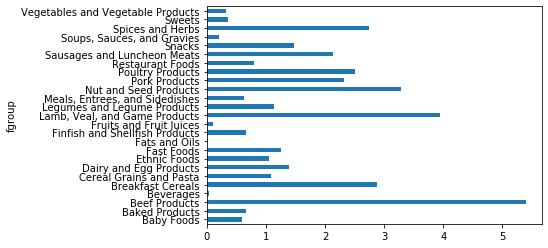

In [34]:
result['Zinc, Zn'].sort_index().plot(kind='barh')

In [40]:
by_nutrient = ndata.groupby(['group', 'description'])
get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [42]:
max_foods.food = max_foods.food.str[:50]

In [43]:
max_foods.ix['Amino Acids']['food']

C:\Users\pulum\AppData\Local\conda\conda\envs\TF_VS_35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


description
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolat